In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
import datetime

In [2]:
def extract_color(img):
    # RGB에서 HSV로 색상공간 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 노란색 점자블록 검출하기 위한 하한값과 상한값 결정
    lower_yellow = np.array([10, 50, 50]) 
    upper_yellow = np.array([40, 255, 255]) 
    
    # 노란색 범위에 있는 픽셀 검출
    # mask 배열에서 노란색 픽셀은 255, 그 외 다른 픽셀은 0으로 표현
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow) 
    
    # mask가 0이 아닌 부분(노란색)만 and 연산 수행
    # mask 부분을 제외하고는 검은색으로 표시
    res = cv2.bitwise_and(img, img, mask = mask)
    return res

In [3]:
# line detection 과정과 동일
def find_edge_and_line(img, res):
    res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
    canny = cv2.Canny(gray, 130, 300)
    lines = cv2.HoughLinesP(
            canny,
            rho = 6,
            theta = np.pi / 60,
            threshold = 160,
            lines = np.array([]),
            minLineLength = 40,
            maxLineGap = 25
        )

    img = np.copy(img)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 3)

    final_res = cv2.addWeighted(img, 0.8, line_img, 1, 0.0)
    return final_res

In [4]:
def resize_img(img):
    img = cv2.resize(img, dsize = (0, 0), fx = 0.5, fy = 0.5, interpolation = cv2.INTER_LINEAR)
    return img

In [5]:
img = cv2.imread('./braillblock.jpg')
res = extract_color(img)

resized_img = resize_img(img)
resized_res = resize_img(res)

final_res = find_edge_and_line(resized_img, resized_res)

cv2.namedWindow('res')   
cv2.moveWindow('res', 40, 30)  
cv2.imshow('res', final_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

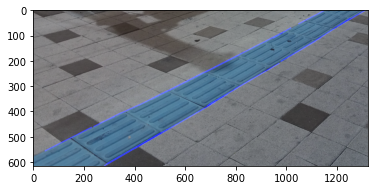

In [6]:
plt.figure()
plt.imshow(final_res)
plt.show()

In [7]:
def find_edge_and_line2(img, res):
    res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
    canny = cv2.Canny(gray, 270, 300)
    lines = cv2.HoughLinesP(
            canny,
            rho = 6,
            theta = np.pi / 60,
            threshold = 50,
            lines = np.array([]),
            minLineLength = 40,
            maxLineGap = 25
        )

    img = np.copy(img)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 3)

    final_res = cv2.addWeighted(img, 0.8, line_img, 1, 0.0)
    return final_res

In [8]:
img = cv2.imread('./braillblock2.jpg')
res = extract_color(img)
final_res = find_edge_and_line2(img, res)

cv2.namedWindow('res')   
cv2.moveWindow('res', 40, 30)  
cv2.imshow('res', final_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

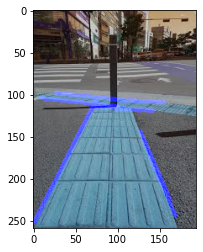

In [9]:
plt.figure()
plt.imshow(final_res)
plt.show()